In [1]:
%autosave 20

Autosaving every 20 seconds


In [2]:
# Import Python Packages
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# pip install plotly
import plotly.express as px


In [4]:
# imports
data_br = pd.read_csv('data_br.csv')

# Criacao de modelo

# Brasil

In [5]:
pais = data_br

In [6]:
#esperado 3749 7 for data transformed

pais.shape

(28, 7)

In [7]:
pais.tail()

,Date,Province/State,Country,Confirmed,Deaths,Recovered,dayCount
23,03/19/2020,NaN,Brazil,621.0,6.0,2.0,23
24,03/20/2020,NaN,Brazil,793.0,11.0,2.0,24
25,03/21/2020,NaN,Brazil,1021.0,15.0,2.0,25
26,03/22/2020,NaN,Brazil,1593.0,25.0,2.0,26
27,03/23/2020,NaN,Brazil,1924.0,34.0,2.0,27


In [8]:
data_model = pais.groupby(['Country','dayCount']).agg({'Confirmed':  ['sum'],'Recovered':  ['sum'], 'Deaths': ['sum'] })
data_model.columns = ['Confirmed', 'Recovered', 'Deaths']
data_model = data_model.reset_index()
data_model.shape

(28, 5)

In [9]:
data_model.head()


,Country,dayCount,Confirmed,Recovered,Deaths
0,Brazil,0,0.0,0.0,0.0
1,Brazil,1,1.0,0.0,0.0
2,Brazil,2,1.0,0.0,0.0
3,Brazil,3,1.0,0.0,0.0
4,Brazil,4,2.0,0.0,0.0


## ----------------------------------------------------------------

## TRAIN  TEST

# RANDON FOREST REGRESSOR

In [10]:
X = data_model.iloc[:, 1:2].values
y = data_model.iloc[:, 4].values

y = y.reshape(-1, 1)


In [11]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor



X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)


previsor = RandomForestRegressor()


random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}


rf_search = RandomizedSearchCV(previsor,
                                random_grid,
                                scoring='neg_mean_squared_error',
                                cv = 3,
                                return_train_score=True,
                                n_jobs = -1,
                                n_iter = 40, 
                                verbose=1  )


In [12]:
rf_search.fit(X_train, np.ravel(y_train,order='C'))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [13]:
rf_search.best_params_

{'n_estimators': 230,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [14]:
rf_confirmed = rf_search.best_estimator_

In [15]:
rf_confirmed

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=230, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
future = np.arange(min(X),100, 1)
future = future.reshape(-1, 1)



In [17]:
rf_pred_future = rf_confirmed.predict(future)

In [18]:
rf_test_pred = rf_confirmed.predict(X_test)

In [19]:
rf_test_pred

array([0., 1., 0., 0., 0., 0., 6., 0., 0.])

In [20]:
rf_pred_future

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  6.,  6., 15.,
       25., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34.,
       34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34.,
       34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34.,
       34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34.,
       34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34.,
       34., 34., 34., 34., 34., 34., 34., 34., 34.])

In [21]:
scoreTreino = rf_confirmed.score(X_train, y_train)
scoreTeste = rf_confirmed.score(X_test, y_test)


In [22]:
scoreTreino

1.0

In [23]:
scoreTeste

0.7320328542094456

MAE: 0.7777777777777778
MSE: 3.2222222222222223


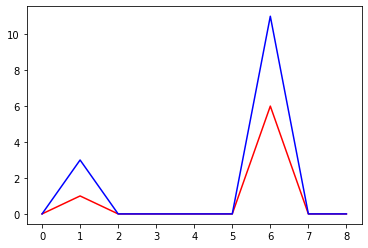

In [24]:
#testando
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.plot(rf_test_pred, color = 'red')
plt.plot(y_test, color = 'blue')

print('MAE:', mean_absolute_error(rf_test_pred, y_test))
print('MSE:', mean_squared_error(rf_test_pred, y_test))



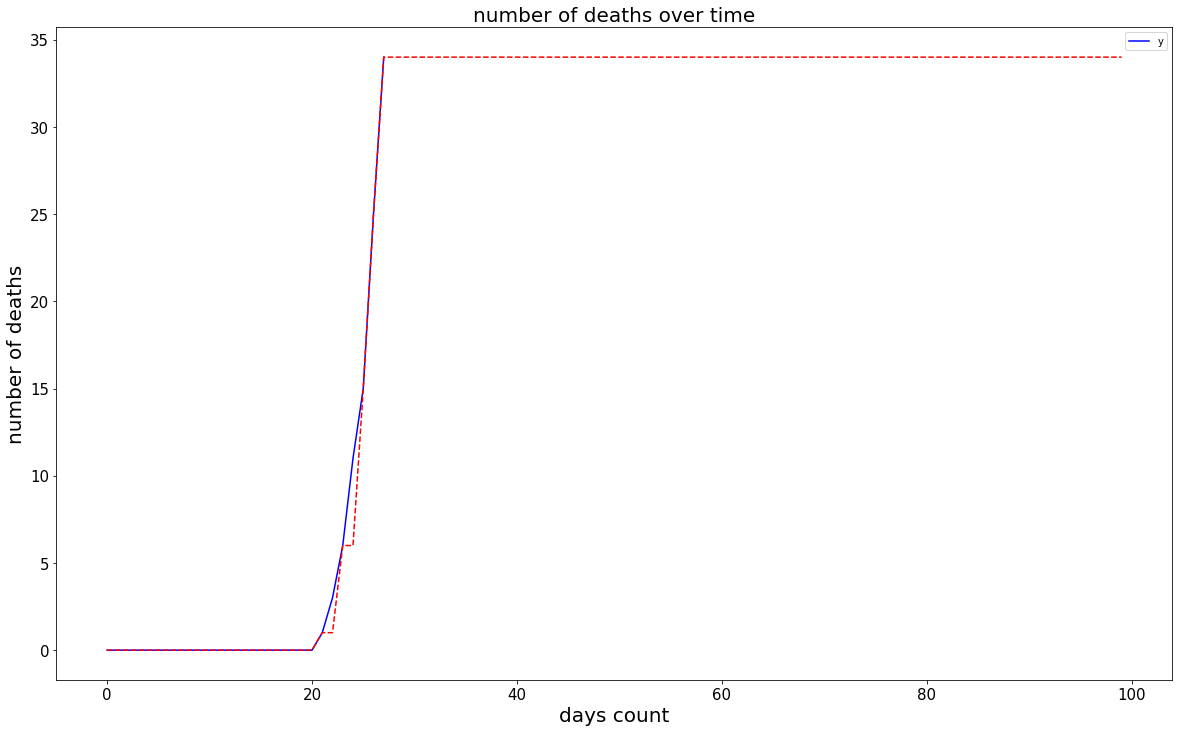

In [25]:
plt.figure(figsize = (20,12))

plt.plot(X,y, color = 'blue')
plt.plot(future, rf_pred_future, linestyle ='dashed', color = 'red')
plt.title('number of deaths over time', size = 20)
plt.xlabel('days count', size = 20)
plt.legend('predict')
plt.ylabel('number of deaths', size = 20)
plt.legend('y')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# --------------------------------------------------------------------------------

# SVM REGRESSOR

In [26]:
data_model.head()

,Country,dayCount,Confirmed,Recovered,Deaths
0,Brazil,0,0.0,0.0,0.0
1,Brazil,1,1.0,0.0,0.0
2,Brazil,2,1.0,0.0,0.0
3,Brazil,3,1.0,0.0,0.0
4,Brazil,4,2.0,0.0,0.0


In [27]:
X = data_model.iloc[:, 1].values
y = data_model.iloc[:, 4].values

In [28]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [29]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  6., 11., 15.,
       25., 34.])

In [30]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)

In [32]:
#svm model
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, train_test_split

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]

svm_grid = {'kernel' : kernel , 'C' : c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

previsor = SVR()

svm_search = RandomizedSearchCV(previsor, 
                                svm_grid,
                                scoring='neg_mean_squared_error',
                                cv=3, 
                                return_train_score=True,
                                n_jobs = -1, 
                                n_iter=40, 
                                verbose=1 )



In [33]:
svm_search.fit(X_train, np.ravel(y_train,order='C'))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [34]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.01, 'C': 1}

In [35]:
svm_confirmed = svm_search.best_estimator_

In [36]:
future = np.arange(min(X),100, 1)
future = future.reshape(-1, 1)



In [37]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
svm_pred_future = svm_confirmed.predict(future)

In [39]:
svm_test_pred = svm_confirmed.predict(X_test)

In [40]:
svm_test_pred

array([ 4.52968255,  3.78681069,  1.21222222, 14.02292183,  2.54357143,
        3.12639036,  1.59133745, -0.17813639, -0.18379483])

In [41]:
svm_pred_future

array([-1.84603175e-01, -1.83794827e-01, -1.78136391e-01, -1.62777778e-01,
       -1.32868901e-01, -8.35596709e-02, -1.00000000e-02,  9.26601984e-02,
        2.29271017e-01,  4.04682540e-01,  6.23744856e-01,  8.91308052e-01,
        1.21222222e+00,  1.59133745e+00,  2.03350381e+00,  2.54357143e+00,
        3.12639036e+00,  3.78681069e+00,  4.52968255e+00,  5.35985597e+00,
        6.28218107e+00,  7.30150793e+00,  8.42268664e+00,  9.65056734e+00,
        1.09900000e+01,  1.24458348e+01,  1.40229218e+01,  1.57261112e+01,
        1.75602527e+01,  1.95301969e+01,  2.16407937e+01,  2.38968930e+01,
        2.63033451e+01,  2.88650000e+01,  3.15867078e+01,  3.44733187e+01,
        3.75296826e+01,  4.07606495e+01,  4.41710700e+01,  4.77657936e+01,
        5.15496708e+01,  5.55275513e+01,  5.97042856e+01,  6.40847236e+01,
        6.86737154e+01,  7.34761111e+01,  7.84967610e+01,  8.37405146e+01,
        8.92122223e+01,  9.49167345e+01,  1.00858900e+02,  1.07043571e+02,
        1.13475597e+02,  

In [42]:
scoreTreino = svm_confirmed.score(X_train, y_train)
scoreTeste = svm_confirmed.score(X_test, y_test)


In [43]:
scoreTreino

0.6149750165113085

In [44]:
scoreTeste

0.6838018708768816

MAE: 3.125447120803065
MSE: 19.51840303229126


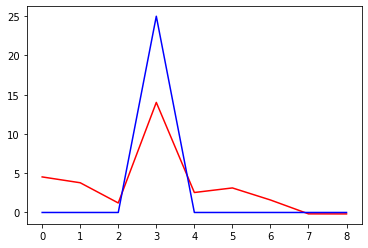

In [45]:
#  Y X PREVISOES
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.plot(svm_test_pred, color = 'red')
plt.plot(y_test, color = 'blue')

print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:', mean_squared_error(svm_test_pred, y_test))



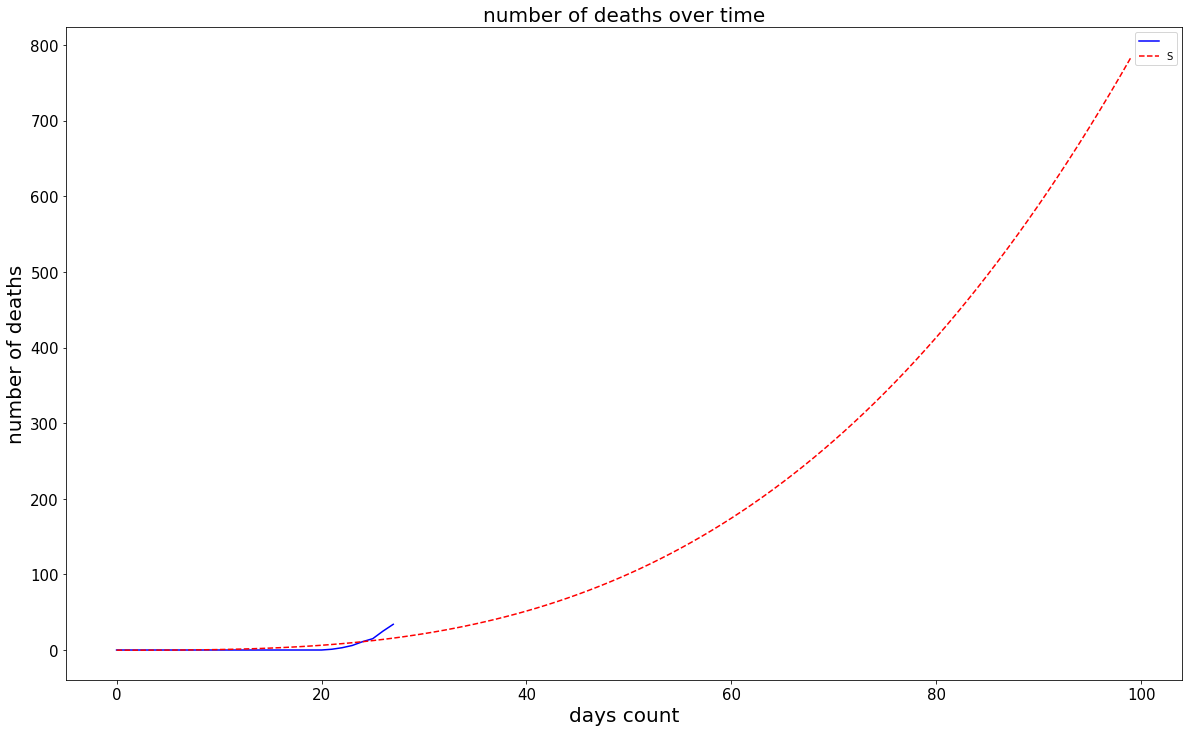

In [47]:
plt.figure(figsize = (20,12))

plt.plot(X,y, color = 'blue')
plt.plot(future, svm_pred_future, linestyle ='dashed', color = 'red')
plt.title('number of deaths over time', size = 20)
plt.xlabel('days count', size = 20)
plt.ylabel('number of deaths', size = 20)
plt.legend(' SVM REGRESSOR PREDICTOR')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()